In [28]:
import tensorflow.keras as keras; 
import tensorflow as tf; 

import numpy as np
import pandas as pd
from matplotlib import pyplot

from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Flatten, Dropout, Activation, Conv2D, MaxPooling2D
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

from sklearn.datasets import make_regression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split 

import numpy as np
import pandas as pd

print("Versão Keras :" , keras.__version__)
print("Versão Tensorflow :" , tf.__version__)

Versão Keras : 2.2.4-tf
Versão Tensorflow : 2.1.0


## Reuters Dataset

* Treino e validação
    * Validação do treino é feita após o fim de cada época
* Carregando dataset com 10000 paralavras


In [11]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)


In [12]:
print(train_data.shape) 
print(train_labels.shape)
print(test_data.shape) 
print(test_labels.shape)

(8982,)
(8982,)
(2246,)
(2246,)


## Decodificando notícias

In [14]:
word_index = reuters.get_word_index()

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()]) 

decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[1]])
print(decoded_newswire)

print('---')

decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[15]])
print(decoded_newswire)

? generale de banque sa lt ? br and lt heller overseas corp of chicago have each taken 50 pct stakes in ? company sa ? factors generale de banque said in a statement it gave no financial details of the transaction sa ? ? turnover in 1986 was 17 5 billion belgian francs reuter 3
---
? commercial and industrial loans on the books of the 10 major new york banks excluding acceptances fell 572 mln dlrs to 64 297 billion in the week ended march 11 the federal reserve bank of new york said including acceptances loans fell 475 mln dlrs to 65 16 billion commercial paper outstanding nationally increased 2 98 billion dlrs to 339 00 billion national business loan data are scheduled to be released on friday reuter 3


In [21]:
#valores únicos de tópicos de notíca
np.unique(train_labels)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45])

In [22]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [24]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

print(one_hot_train_labels[0])


[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


## Rede Neural para classificação

In [25]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(10000,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(46, activation='softmax'))

In [26]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## Definindo uma parte dos dados para treino e outra para validação após cada época

In [50]:
x_train80, x_test, y_train80, y_test = train_test_split(x_train, one_hot_train_labels, test_size=0.2, random_state = 42)

partial_x_train, x_val, partial_y_train, y_val = train_test_split(x_train80, y_train80, test_size=0.2, random_state = 42)


In [34]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 5748 samples, validate on 1437 samples
Epoch 1/20
5748/5748 [==============================] - 1s 218us/sample - loss: 2.8313 - accuracy: 0.5136 - val_loss: 1.9437 - val_accuracy: 0.6159
Epoch 2/20
5748/5748 [==============================] - 0s 59us/sample - loss: 1.5706 - accuracy: 0.6983 - val_loss: 1.4620 - val_accuracy: 0.6931
Epoch 3/20
5748/5748 [==============================] - 0s 62us/sample - loss: 1.1394 - accuracy: 0.7695 - val_loss: 1.2928 - val_accuracy: 0.7182
Epoch 4/20
5748/5748 [==============================] - 0s 58us/sample - loss: 0.9034 - accuracy: 0.8163 - val_loss: 1.2018 - val_accuracy: 0.7460
Epoch 5/20
5748/5748 [==============================] - 0s 59us/sample - loss: 0.7360 - accuracy: 0.8504 - val_loss: 1.1227 - val_accuracy: 0.7530
Epoch 6/20
5748/5748 [==============================] - 0s 59us/sample - loss: 0.5998 - accuracy: 0.8767 - val_loss: 1.0958 - val_accuracy: 0.7509
Epoch 7/20
5748/5748 [==============================] - 0s 58us/sampl

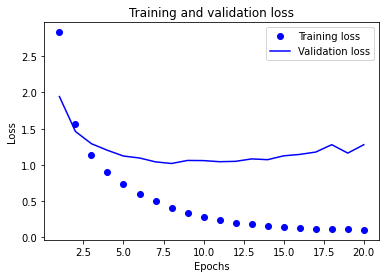

In [35]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


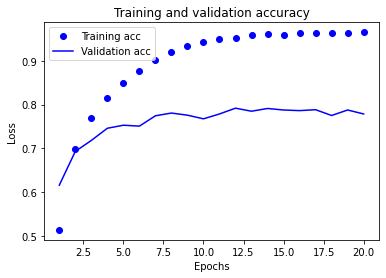

In [36]:
#plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## avaliação treino e teste

In [39]:
#x_train80, x_test, y_train80, y_test
score = model.evaluate(x_test, y_test)
print(score)


1797/1797 [==============================] - 0s 122us/sample - loss: 1.1609 - accuracy: 0.7869
[1.1609310898836547, 0.786867]


## Algoritmo aleatório de classificação (Baseline)

In [40]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array)) / len(test_labels)

0.19011576135351738

In [42]:
## Usando função loss para dados esparsos (classes sem one_hot encoding)

In [43]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)
print(y_train)

x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

[ 3  4  3 ... 25  3 25]


### Exemplo de utilização de função de loss para dados esparsos

In [44]:
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [45]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 114us/sample - loss: 0.4698 - accuracy: 0.9039 - val_loss: 0.4212 - val_accuracy: 0.9170
Epoch 2/20
7982/7982 [==============================] - 0s 54us/sample - loss: 0.3112 - accuracy: 0.9271 - val_loss: 0.4164 - val_accuracy: 0.9120
Epoch 3/20
7982/7982 [==============================] - 0s 56us/sample - loss: 0.2432 - accuracy: 0.9381 - val_loss: 0.4358 - val_accuracy: 0.9040
Epoch 4/20
7982/7982 [==============================] - 0s 55us/sample - loss: 0.2046 - accuracy: 0.9459 - val_loss: 0.4531 - val_accuracy: 0.9000
Epoch 5/20
7982/7982 [==============================] - 0s 55us/sample - loss: 0.1734 - accuracy: 0.9501 - val_loss: 0.4611 - val_accuracy: 0.9020
Epoch 6/20
7982/7982 [==============================] - 0s 54us/sample - loss: 0.1542 - accuracy: 0.9526 - val_loss: 0.5497 - val_accuracy: 0.8800
Epoch 7/20
7982/7982 [==============================] - 0s 56us/sampl

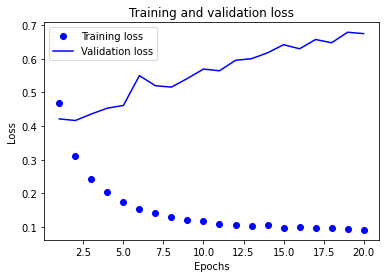

In [46]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

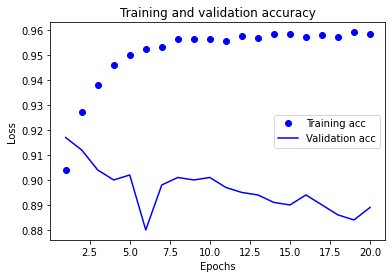

In [47]:
#plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Rede Neural com poucos neuronios nas camadas escondidas
* Apresenta dificuldade em representar as classes

In [51]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(10000,)))
model.add(Dense(4, activation='relu'))
model.add(Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Train on 5748 samples, validate on 1437 samples
Epoch 1/20
5748/5748 [==============================] - 1s 149us/sample - loss: 3.0386 - accuracy: 0.2338 - val_loss: 2.3346 - val_accuracy: 0.5205
Epoch 2/20
5748/5748 [==============================] - 0s 74us/sample - loss: 1.8160 - accuracy: 0.5924 - val_loss: 1.6345 - val_accuracy: 0.6026
Epoch 3/20
5748/5748 [==============================] - 0s 79us/sample - loss: 1.3335 - accuracy: 0.6594 - val_loss: 1.4596 - val_accuracy: 0.6381
Epoch 4/20
5748/5748 [==============================] - 0s 77us/sample - loss: 1.1355 - accuracy: 0.7152 - val_loss: 1.3924 - val_accuracy: 0.6639
Epoch 5/20
5748/5748 [==============================] - 0s 77us/sample - loss: 1.0057 - accuracy: 0.7512 - val_loss: 1.3673 - val_accuracy: 0.6736
Epoch 6/20
5748/5748 [==============================] - 0s 79us/sample - loss: 0.9064 - accuracy: 0.7655 - val_loss: 1.3588 - val_accuracy: 0.6841
Epoch 7/20
5748/5748 [==============================] - 0s 76us/sampl

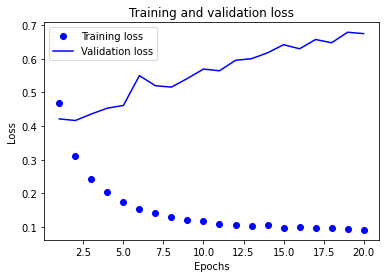

In [52]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

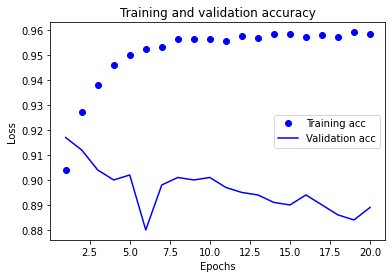

In [53]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Exemplo com regressão

In [54]:
from keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [66]:
print(train_data.shape)
print(test_data.shape)

(404, 13)
(102, 13)


# Normalização

In [55]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

## Diferentes métricas de loss e métrica MSE x MAE

In [56]:
from keras import models
from keras import layers

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
                            input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

## Validando rede neural com k-fold

In [69]:
k=4
num_val_samples = len(train_data) // k 
num_epochs = 20
all_scores = []

In [64]:
print(num_val_samples)

202


In [70]:
all_mae_histories = []

for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples] 
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
 
    partial_train_data = np.concatenate( 
        [train_data[:i * num_val_samples],
        train_data[(i + 1) * num_val_samples:]], 
        axis=0)

    partial_train_targets = np.concatenate( 
        [train_targets[:i * num_val_samples],
        train_targets[(i + 1) * num_val_samples:]], 
        axis=0)
    
    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
        epochs=num_epochs, batch_size=1, verbose=0)
    
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)
    
    mae_history = history.history['loss']
    all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [71]:
print(all_scores)
print(np.mean(all_scores))

[1.9228776693344116, 2.6556992530822754, 2.42950177192688, 2.6317241191864014]
2.409950703382492


In [72]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

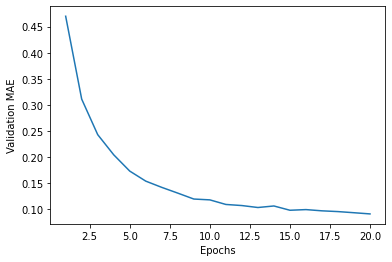

In [73]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

# Comparando MSE x MAE

In [74]:
model = build_model()
model.fit(train_data, train_targets,
  epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

102/102 [==============================] - 0s 226us/step


In [75]:
print(test_mae_score)

print(test_mse_score)

2.779961109161377
18.129408593271293


## Estratégia de refinamento do modelo
* Definindo conjunto de treino, validação e teste
    * Treino do modelo é feito na base de treino e avaliado na base de validação
    * Otimizações são aplicadas ao modelo
    * Treino do modelo na base de treino e validação concatenadas 
    * Avaliação do modelo na base de teste

* k-fold (Adequado para bases pequenas)
    * validação utilizando diferentes pequenos conjuntos da base completa

## Reuters 
    
* Comparando MLP com dois tipos de ativação 
    * Relu : Rectified Linear Unit.
    * Selu : Scaled Exponential Linear Unit

* Estratégia de geração de rede neurais com número variado de camadas

'''
Klambauer, G., Unterthiner, T., Mayr, A., & Hochreiter, S. (2017).
  Self-Normalizing Neural Networks. arXiv preprint arXiv:1706.02515.
  https://arxiv.org/abs/1706.02515
'''

In [97]:
from __future__ import print_function

import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import reuters
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.layers.noise import AlphaDropout
from keras.preprocessing.text import Tokenizer

max_words = 1000
batch_size = 16
epochs = 40
plot = True

def create_network(n_dense=6,
                   dense_units=16,
                   activation='selu',
                   dropout=AlphaDropout,
                   dropout_rate=0.1,
                   kernel_initializer='lecun_normal',
                   optimizer='adam',
                   num_classes=1,
                   max_words=max_words):
    """Generic function to create a fully-connected neural network.
    # Arguments
        n_dense: int > 0. Number of dense layers.
        dense_units: int > 0. Number of dense units per layer.
        dropout: keras.layers.Layer. A dropout layer to apply.
        dropout_rate: 0 <= float <= 1. The rate of dropout.
        kernel_initializer: str. The initializer for the weights.
        optimizer: str/keras.optimizers.Optimizer. The optimizer to use.
        num_classes: int > 0. The number of classes to predict.
        max_words: int > 0. The maximum number of words per data point.
    # Returns
        A Keras model instance (compiled).
    """
    model = Sequential()
    model.add(Dense(dense_units, input_shape=(max_words,),
                    kernel_initializer=kernel_initializer))
    model.add(Activation(activation))
    model.add(dropout(dropout_rate))

    for i in range(n_dense - 1):
        model.add(Dense(dense_units, kernel_initializer=kernel_initializer))
        model.add(Activation(activation))
        model.add(dropout(dropout_rate))

    model.add(Dense(num_classes))
    model.add(Activation('softmax'))
    model.compile(loss='categorical_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])
    return model


network1 = {
    'n_dense': 6,
    'dense_units': 16,
    'activation': 'relu',
    'dropout': Dropout,
    'dropout_rate': 0.5,
    'kernel_initializer': 'glorot_uniform',
    'optimizer': 'sgd'
}

network2 = {
    'n_dense': 6,
    'dense_units': 16,
    'activation': 'selu',
    'dropout': AlphaDropout,
    'dropout_rate': 0.1,
    'kernel_initializer': 'lecun_normal',
    'optimizer': 'sgd'
}

print('Loading data...')
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=max_words,
                                                         test_split=0.2)

print(np.unique(y_test))
    
#from keras.datasets import imdb
#(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_words)#,
                                                         #test_split=0.2)

    
#(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_words)
#(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

#XX,yy = imdb.load_data(num_words=max_words)#,

#x_train, y_train, x_test, y_test = train_test_split(XX, yy, test_size=0.2, random_state = 42)


print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

num_classes = np.max(y_train) + 1
print(num_classes, 'classes')

print('Vectorizing sequence data...')
tokenizer = Tokenizer(num_words=max_words)
x_train = tokenizer.sequences_to_matrix(x_train, mode='binary')
x_test = tokenizer.sequences_to_matrix(x_test, mode='binary')
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

print('Convert class vector to binary class matrix '
      '(for use with categorical_crossentropy)')
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

print('\nBuilding network 1...')

model1 = create_network(num_classes=num_classes, **network1)
history_model1 = model1.fit(x_train,
                            y_train,
                            batch_size=batch_size,
                            epochs=epochs,
                            verbose=1,
                            validation_split=0.1)

score_model1 = model1.evaluate(x_test,
                               y_test,
                               batch_size=batch_size,
                               verbose=1)


print('\nBuilding network 2...')
model2 = create_network(num_classes=num_classes, **network2)

history_model2 = model2.fit(x_train,
                            y_train,
                            batch_size=batch_size,
                            epochs=epochs,
                            verbose=1,
                            validation_split=0.1)

score_model2 = model2.evaluate(x_test,
                               y_test,
                               batch_size=batch_size,
                               verbose=1)

print('\nNetwork 1 results')
print('Hyperparameters:', network1)
print('Test score:', score_model1[0])
print('Test accuracy:', score_model1[1])
print('Network 2 results')
print('Hyperparameters:', network2)
print('Test score:', score_model2[0])
print('Test accuracy:', score_model2[1])

plt.plot(range(epochs),
         history_model1.history['val_loss'],
         'g-',
         label='Network 1 Val Loss')
plt.plot(range(epochs),
         history_model2.history['val_loss'],
         'r-',
         label='Network 2 Val Loss')
plt.plot(range(epochs),
         history_model1.history['loss'],
         'g--',
         label='Network 1 Loss')
plt.plot(range(epochs),
         history_model2.history['loss'],
         'r--',
         label='Network 2 Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('comparison_of_networks.png')

Loading data...
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
8982 train sequences
2246 test sequences
46 classes
Vectorizing sequence data...
x_train shape: (8982, 1000)
x_test shape: (2246, 1000)
Convert class vector to binary class matrix (for use with categorical_crossentropy)
y_train shape: (8982, 46)
y_test shape: (2246, 46)

Building network 1...
Train on 8083 samples, validate on 899 samples
Epoch 1/40
8083/8083 [==============================] - 4s 472us/step - loss: 3.1912 - accuracy: 0.3312 - val_loss: 2.6217 - val_accuracy: 0.3315
Epoch 2/40
8083/8083 [==============================] - 4s 439us/step - loss: 2.5993 - accuracy: 0.3478 - val_loss: 2.4195 - val_accuracy: 0.3315
Epoch 3/40
8083/8083 [==============================] - 3s 417us/step - loss: 2.4260 - accuracy: 0.3506 - val_loss: 2.2660 - val_accuracy: 0.3315
Epoch 4/40
8083/8083 [==============================] - 3s 419us

KeyboardInterrupt: 

## IMDB
* Rede Neural para predição binária
* Avaliando Dropout


In [76]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [77]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
     [(value, key) for (key, value) in word_index.items()])

decoded_review = ' '.join(
    [reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [79]:
print(decoded_review)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

In [80]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
          results[i, sequence] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [81]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [82]:
#from keras import models
#from keras import layers
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(10000,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [83]:
model.compile(optimizer='rmsprop',
                      loss='binary_crossentropy',
                      metrics=['accuracy'])

Para monitorar durante o treinamento a precisão do modelo em dados nunca antes vistos, 
você cria um conjunto de validação separando 10.000 amostras dos dados de treinamento originais.


In [84]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]


In [85]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))


Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 118us/sample - loss: 0.4954 - acc: 0.7939 - val_loss: 0.3676 - val_acc: 0.8762
Epoch 2/20
15000/15000 [==============================] - 1s 70us/sample - loss: 0.2954 - acc: 0.9049 - val_loss: 0.3035 - val_acc: 0.8892
Epoch 3/20
15000/15000 [==============================] - 1s 69us/sample - loss: 0.2197 - acc: 0.9267 - val_loss: 0.2896 - val_acc: 0.8824
Epoch 4/20
15000/15000 [==============================] - 1s 87us/sample - loss: 0.1719 - acc: 0.9462 - val_loss: 0.2846 - val_acc: 0.8863
Epoch 5/20
15000/15000 [==============================] - 1s 74us/sample - loss: 0.1389 - acc: 0.9567 - val_loss: 0.2955 - val_acc: 0.8828
Epoch 6/20
15000/15000 [==============================] - 2s 106us/sample - loss: 0.1147 - acc: 0.9645 - val_loss: 0.3012 - val_acc: 0.8823
Epoch 7/20
15000/15000 [==============================] - 2s 112us/sample - loss: 0.0940 - acc: 0.9720 - val_loss:

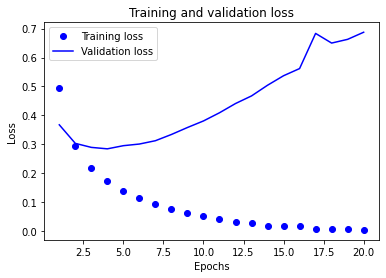

In [86]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

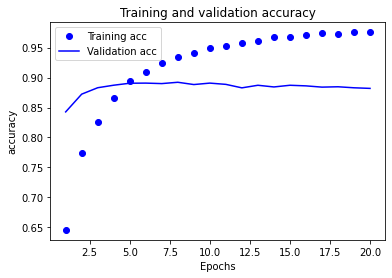

In [91]:
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [88]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 130us/step - loss: 0.6286 - acc: 0.6459 - val_loss: 0.5163 - val_acc: 0.8427
Epoch 2/20
15000/15000 [==============================] - 1s 100us/step - loss: 0.5093 - acc: 0.7737 - val_loss: 0.4041 - val_acc: 0.8723
Epoch 3/20
15000/15000 [==============================] - 2s 101us/step - loss: 0.4259 - acc: 0.8254 - val_loss: 0.3442 - val_acc: 0.8830
Epoch 4/20
15000/15000 [==============================] - 2s 110us/step - loss: 0.3562 - acc: 0.8661 - val_loss: 0.3018 - val_acc: 0.8872
Epoch 5/20
15000/15000 [==============================] - 1s 90us/step - loss: 0.2986 - acc: 0.8939 - val_loss: 0.2775 - val_acc: 0.8905
Epoch 6/20
15000/15000 [==============================] - 1s 100us/step - loss: 0.2647 - acc: 0.9091 - val_loss: 0.2753 - val_acc: 0.8907
Epoch 7/20
15000/15000 [==============================] - 1s 89us/step - loss: 0.2326 - acc: 0.9236 - val_loss: 0.2723 - va

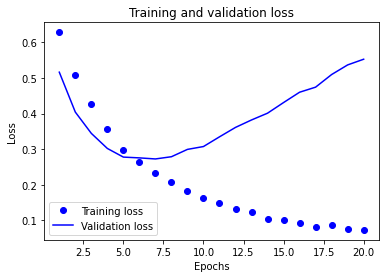

In [89]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

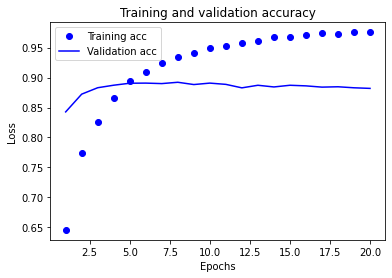

In [90]:
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()